# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Entendiendo las Variables

In [2]:
movies_df = pd.read_csv('movies.csv')

In [3]:
movies_df.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,genres_id,production_companies_id,production_countries_iso_3166_1,spoken_language_iso_639_1,cast,director,release_year,release_month,release_day,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,"[16, 35, 10751]",[3],['US'],['en'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,1995,10,30,12.451801
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"[12, 14, 10751]","[559, 2550, 10201]",['US'],"['en', 'fr']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,1995,12,15,4.043035
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"[10749, 35]","[6194, 19464]",['US'],['en'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,1995,12,22,0.000000
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,"[35, 18, 10749]",[306],['US'],['en'],"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,1995,12,22,5.090760
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,[35],"[5842, 9195]",['US'],['en'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,1995,2,10,0.000000


In [4]:
movies_df.shape

(45452, 24)

In [5]:
movies_df.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'belongs_to_collection_id', 'genres_id',
       'production_companies_id', 'production_countries_iso_3166_1',
       'spoken_language_iso_639_1', 'cast', 'director', 'release_year',
       'release_month', 'release_day', 'return'],
      dtype='object')

In [6]:
movies_df.nunique()

budget                              1223
id                                 45346
original_language                     89
overview                           44232
popularity                         43731
release_date                       17333
revenue                             6863
runtime                              353
status                                 6
tagline                            20269
title                              42196
vote_average                          92
vote_count                          1820
belongs_to_collection_id            1695
genres_id                           4064
production_companies_id            22702
production_countries_iso_3166_1     2388
spoken_language_iso_639_1           1930
cast                               42657
director                           17549
release_year                         135
release_month                         12
release_day                           31
return                              5232
dtype: int64

In [7]:
movies_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,budget,id,popularity,revenue,runtime,vote_average,vote_count,belongs_to_collection_id,release_year,release_month,release_day,return
count,45452.000000,45452.000000,45452.000000,45452.000000,45206.000000,45452.000000,45452.000000,4497.000000,45452.000000,45452.000000,45452.000000,45452.000000
mean,4231200.978901,107991.064926,2.926828,11219050.906297,94.179821,5.623962,109.987283,183889.401379,1991.882579,6.458704,14.214006,658.939257
std,17429234.891636,112118.576134,6.006405,64339156.083161,38.331639,1.915585,491.347202,141616.252430,24.057750,3.628430,9.284828,74630.824279
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1874.000000,1.000000,1.000000,-9.061112
25%,0.000000,26367.750000,0.389040,0.000000,85.000000,5.000000,3.000000,85960.000000,1978.000000,3.000000,6.000000,0.000000
50%,0.000000,59872.000000,1.131324,0.000000,95.000000,6.000000,10.000000,141448.000000,2001.000000,7.000000,14.000000,0.000000
75%,0.000000,156330.500000,3.694242,0.000000,107.000000,6.800000,34.000000,294172.000000,2010.000000,10.000000,22.000000,0.000000
max,380000000.000000,469172.000000,547.488298,2787965087.000000,1256.000000,10.000000,14075.000000,480160.000000,2020.000000,12.000000,31.000000,12396383.000000


- Las columnas Budget y revenue tiene en su mayoria valores de 0, por lo tanto no puede brindarnos información suficiente.
- Igual ocurre con la columna return, la cual es derivada de las anteriores.

In [8]:
null_values = movies_df.isnull().sum()/movies_df.shape[0]*100 # % de nulos
null_values

budget                              0.000000
id                                  0.000000
original_language                   0.024201
overview                            2.070316
popularity                          0.000000
release_date                        0.000000
revenue                             0.000000
runtime                             0.541230
status                              0.176010
tagline                            55.062483
title                               0.000000
vote_average                        0.000000
vote_count                          0.000000
belongs_to_collection_id           90.106046
genres_id                           5.247294
production_companies_id            26.001056
production_countries_iso_3166_1    13.684766
spoken_language_iso_639_1           8.305465
cast                                0.002200
director                            1.839303
release_year                        0.000000
release_month                       0.000000
release_da

## Limpiando Data

In [9]:
movies_df_ = movies_df.copy() #copia para probar los cambios

In [10]:
movies_df_ = movies_df_.drop(['id','tagline','status','release_month','release_day','budget','revenue','return','release_date','overview'],axis=1)
movies_df_.head()

# Las columnas borradas han sido las que consideramos innecesarias para hacer un analisis estadistico o con falta de datos.
# A su vez, son columnas que no usaremos para el modelo de ML.

,original_language,popularity,runtime,title,vote_average,vote_count,belongs_to_collection_id,genres_id,production_companies_id,production_countries_iso_3166_1,spoken_language_iso_639_1,cast,director,release_year
0,en,21.946943,81.0,Toy Story,7.7,5415.0,10194.0,"[16, 35, 10751]",[3],['US'],['en'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,1995
1,en,17.015539,104.0,Jumanji,6.9,2413.0,NaN,"[12, 14, 10751]","[559, 2550, 10201]",['US'],"['en', 'fr']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,1995
2,en,11.712900,101.0,Grumpier Old Men,6.5,92.0,119050.0,"[10749, 35]","[6194, 19464]",['US'],['en'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,1995
3,en,3.859495,127.0,Waiting to Exhale,6.1,34.0,NaN,"[35, 18, 10749]",[306],['US'],['en'],"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,1995
4,en,8.387519,106.0,Father of the Bride Part II,5.7,173.0,96871.0,[35],"[5842, 9195]",['US'],['en'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,1995


In [11]:
movies_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   original_language                45441 non-null  object 
 1   popularity                       45452 non-null  float64
 2   runtime                          45206 non-null  float64
 3   title                            45452 non-null  object 
 4   vote_average                     45452 non-null  float64
 5   vote_count                       45452 non-null  float64
 6   belongs_to_collection_id         4497 non-null   float64
 7   genres_id                        43067 non-null  object 
 8   production_companies_id          33634 non-null  object 
 9   production_countries_iso_3166_1  39232 non-null  object 
 10  spoken_language_iso_639_1        41677 non-null  object 
 11  cast                             45451 non-null  object 
 12  director          

In [12]:
movies_df_['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [13]:
movies_df_.groupby('original_language')['vote_average'].apply(np.mean)

original_language
ab    5.000000
af    6.200000
am    7.450000
ar    6.817949
ay    6.000000
        ...   
vi    5.880000
wo    6.520000
xx    5.876471
zh    6.382598
zu    8.300000
Name: vote_average, Length: 89, dtype: float64

C:\Users\byjho\AppData\Local\Temp\ipykernel_5076\483453720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies_df_.corr(),annot=True) # belongs_to_collection no tiene un significado real en las graficas


<Axes: >

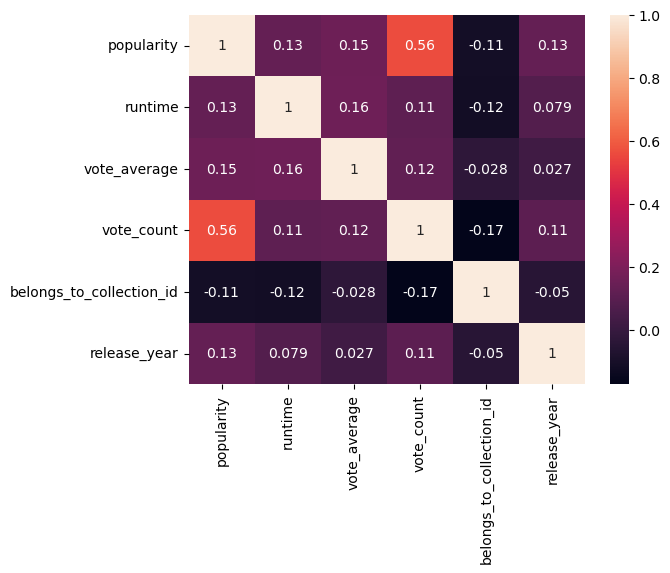

In [14]:
sns.heatmap(movies_df_.corr(),annot=True) # belongs_to_collection no tiene un significado real en las graficas

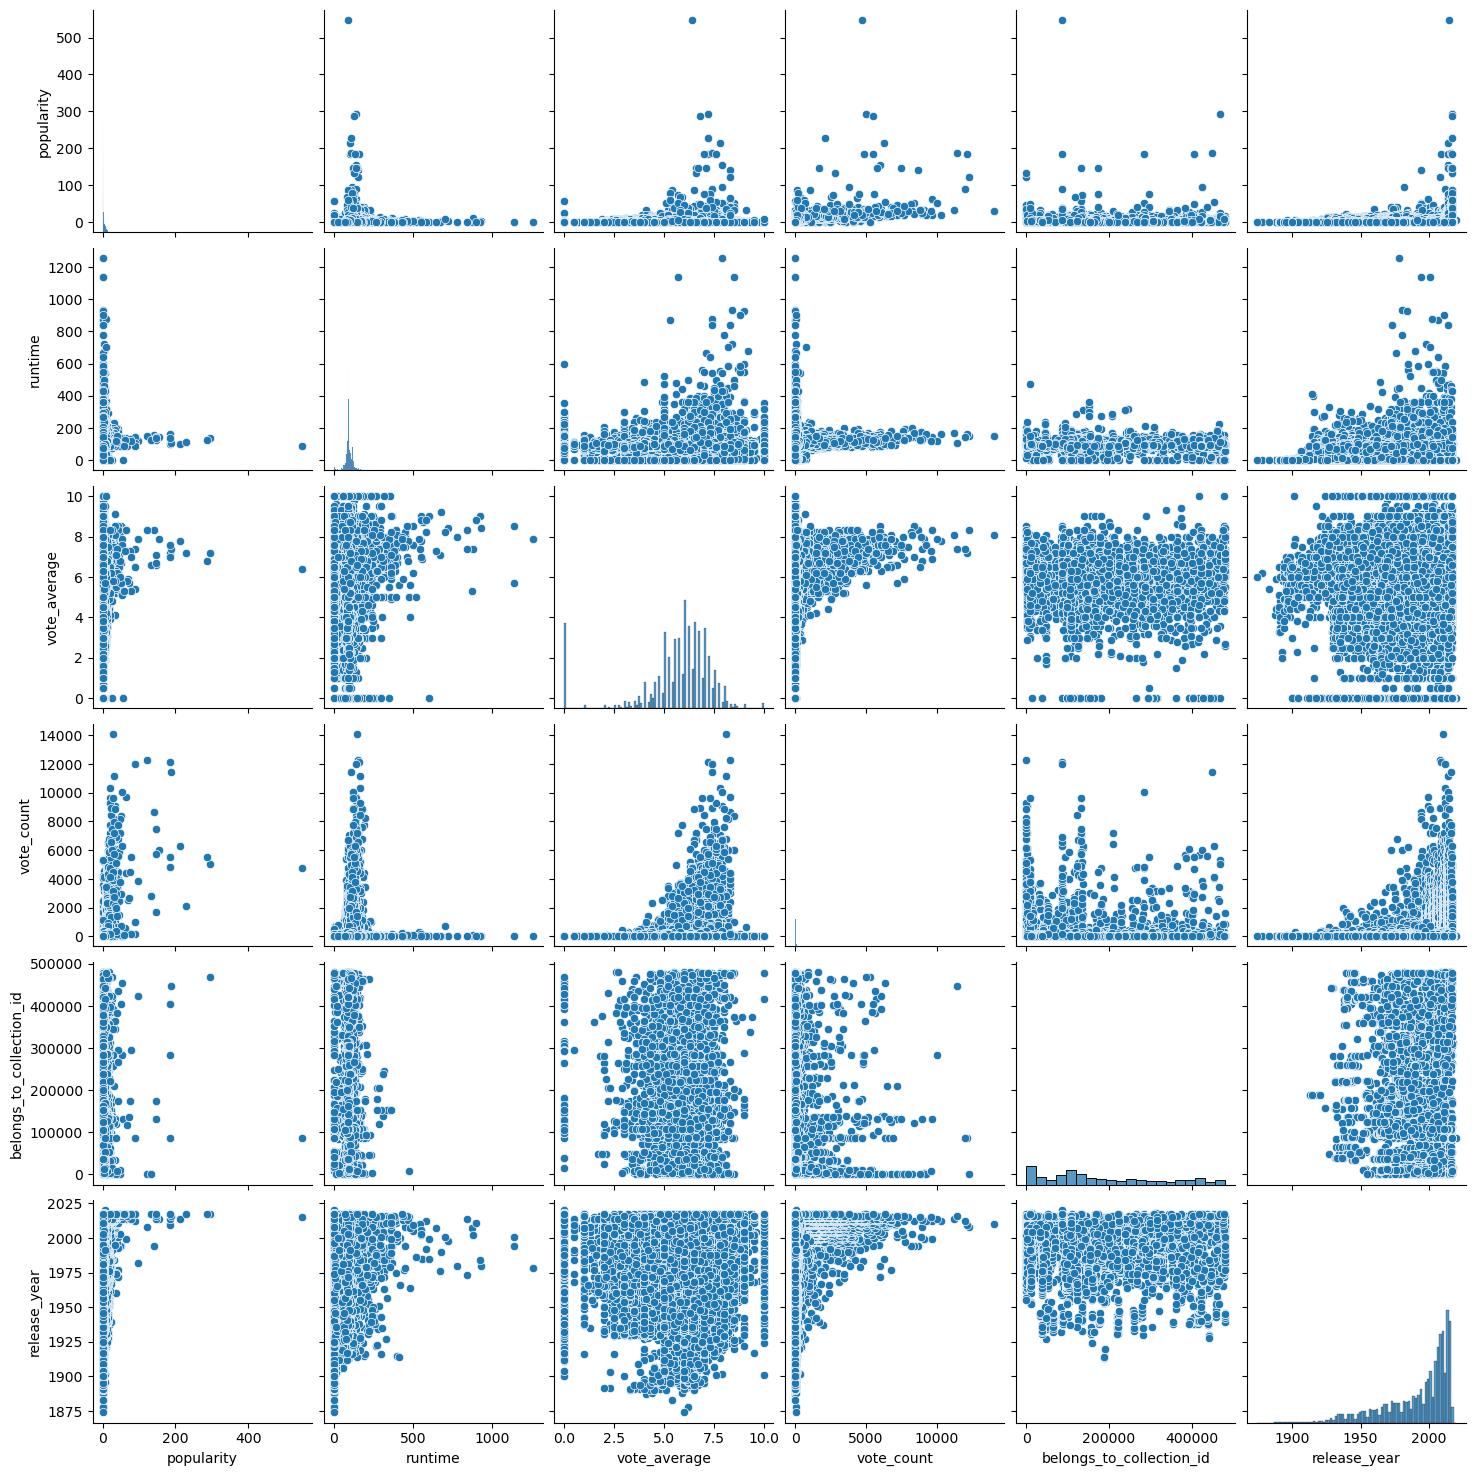

In [15]:
sns.pairplot(movies_df_)

Notamos que no existe correlacion fuerte entre las variables numericas que tenemos

<Axes: >

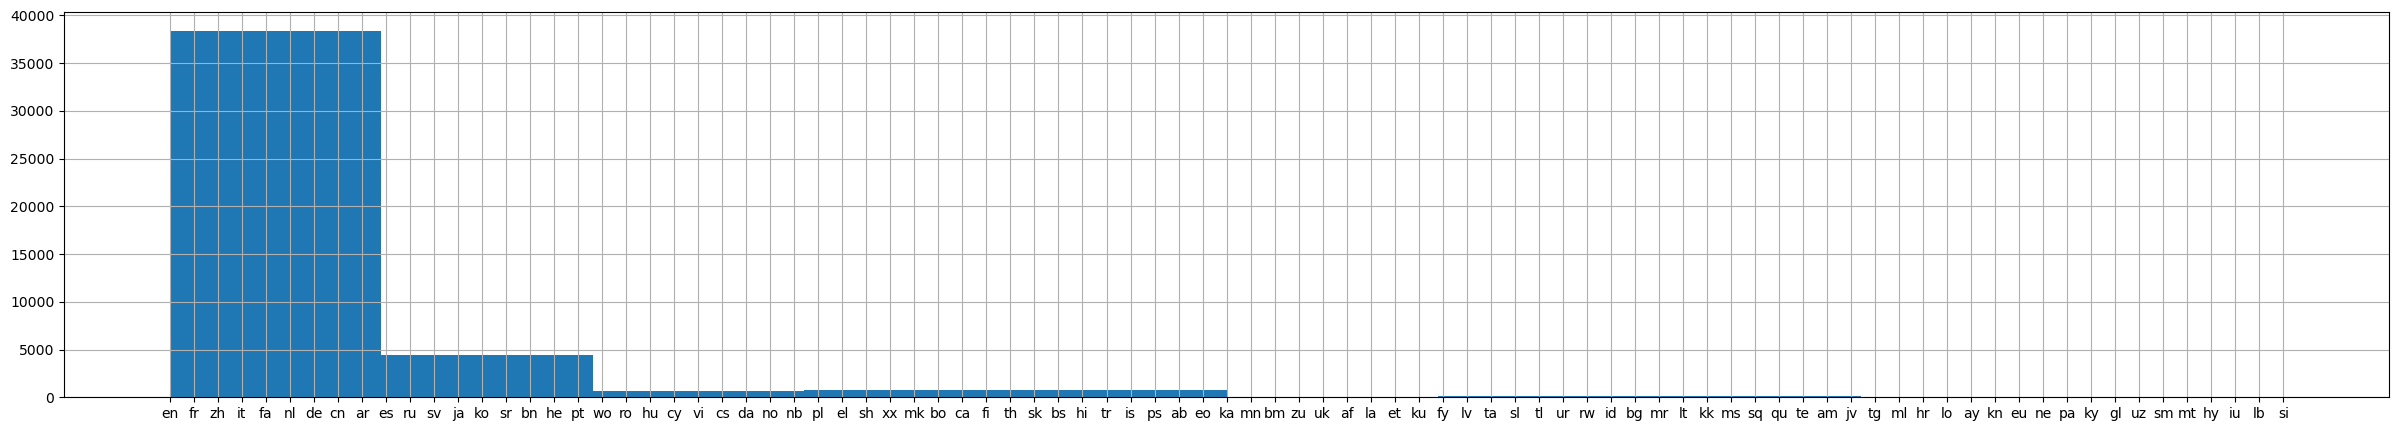

In [16]:
movies_df_['original_language'].hist(figsize=(30,5))

In [17]:
## outliers

<Axes: >

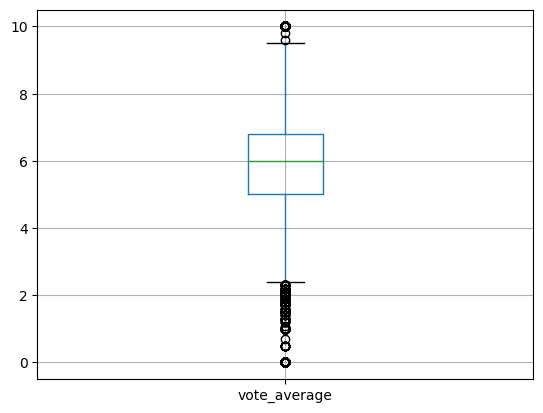

In [18]:
movies_df_.boxplot('vote_average')

<Axes: >

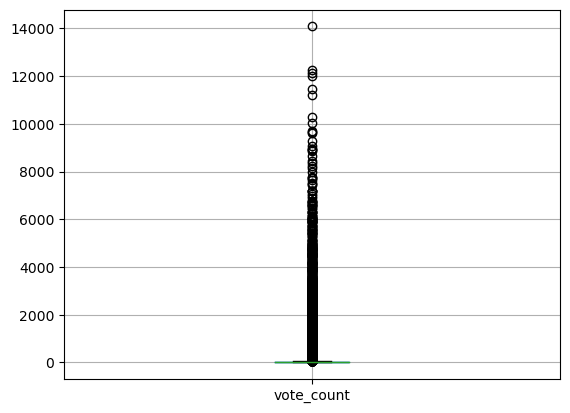

In [19]:
movies_df_.boxplot('vote_count')

In [20]:
movies_df_.to_csv('movies_eda.csv',index=False)